<a href="https://colab.research.google.com/github/YogeshRathee512/Machine-learning-projects/blob/main/Graduate%20Admission%20Prediction%20using%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv');

In [29]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [31]:
df.duplicated().sum()

0

In [32]:
df.drop(columns=['Serial No.'],inplace=True)

In [33]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
X = df.iloc[:,0:-1]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [35]:
y=df.iloc[:,-1]
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1);


In [37]:
X_train.head()
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
304,313,106,2,2.5,2.0,8.43,0
340,312,107,3,3.0,3.0,8.46,1
47,339,119,5,4.5,4.0,9.70,0
67,316,107,2,3.5,3.5,8.64,1
479,325,110,4,4.5,4.0,8.96,1


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [40]:
model = Sequential()

In [50]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
 dense_2 (Dense)             (None, 7)                 14        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 142 (568.00 Byte)
Trainable params: 142 (568.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [53]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.6532 - val_loss: 0.6545
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5555 - val_loss: 0.5710
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4942 - val_loss: 0.5158
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4473 - val_loss: 0.4643
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3966 - val_loss: 0.4063
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3447 - val_loss: 0.3498
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2928 - val_loss: 0.2926
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2393 - val_loss: 0.2333
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1846 - val_loss: 0.1727
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1307 - val_loss: 0.1141
Epoch 11

In [54]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7939295364536174

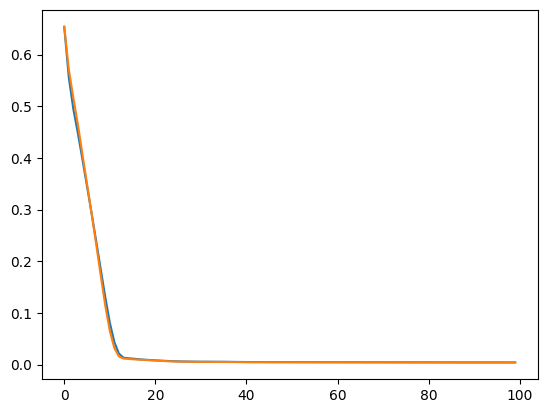

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])